# Project-010-41 Final Report

Siluni Jayarathne (#91717736), 

Jenna Lee (#66436908), 

William Xie (64489479).

## Introduction

A research group in Computer Science at UBC collected data on individuals playing Minecraft, recording players' actions as they navigated through the Minecraft server.

In this project, we aim to investigate whether a person’s age and the number of hours they’ve played can be used to predict their experience level. To do this, we will apply a k-nearest neighbors (k-NN) classification model. This method is appropriate because the target variable—experience level—is categorical. However, a potential limitation of k-NN is that its predictions rely on the closest neighbors, which may lead to inaccuracies if nearby data points are not representative.

We will split the dataset into 75% for training and 25% for testing, with the split taking place after initial data exploration. Additionally, we will apply 5-fold cross-validation on the training set to better evaluate the model’s performance.

The player.csv dataset contains 196 observations, each representing a player with various personal and gaming-related details across 7 variables. These include attributes such as name, age, hashed email, experience level, and others.


Variables and Data Types:

1. experience (factor) – The player’s level of experience, categorized as "Pro", "Veteran", "Amateur", "Regular", or "Beginner".

2. subscribe (logical) – Indicates whether the player is subscribed (TRUE) or not (FALSE) to the game-related newsletter.

3. hashedEmail (character) – A hashed representation of the player’s email address.

4. played_hours (double) – The total number of hours the player has spent playing.

5. name (character) – The player’s name.

6. gender (factor) – The player’s gender.

7. Age (integer) – The player’s age in years.


Issues and Potential Concerns in the Dataset:

1. The data types for experience and gender should be factor (fct) instead of character (chr).

2. The Age column contains missing values, which may require imputation or removal depending on their frequency and impact.

3. The hashedEmail field contains encrypted values that are not useful for modeling or analysis in their current form.

## Methods and Results

In [3]:
# What Each R Library does
library(tidyverse)                 # Toolbox for wrangling and visualizing data
library(repr)                      # Controls how the visualizations are displayed
library(tidymodels)                # Framework for modeling and machine learning
options(repr.matrix.max.rows = 6)  # Limit the number of rows displayed in data frames to 6

In [4]:
# Load the dataset, show first 6 rows and last 6 rows
player_data = read_csv("https://raw.githubusercontent.com/silunij/dsci_individual/refs/heads/main/players.csv")
head(player_data)
tail(player_data)

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Amateur,TRUE,644fe4200c19a73768b3fa598afcbd0948f7557925b7f17166285da23af31cc6,0.0,Rhys,Male,20
Amateur,TRUE,b6e9e593b9ec51c5e335457341c324c34a2239531e1890b93ca52ac1dc76b08f,0.0,Bailey,Female,17
Veteran,FALSE,71453e425f07d10da4fa2b349c83e73ccdf0fb3312f778b35c5802c3292c87bd,0.3,Pascal,Male,22
Amateur,FALSE,d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb,0.0,Dylan,Prefer not to say,17
Amateur,FALSE,f19e136ddde68f365afc860c725ccff54307dedd13968e896a9f890c40aea436,2.3,Harlow,Male,17
Pro,TRUE,d9473710057f7d42f36570f0be83817a4eea614029ff90cf50d8889cdd729d11,0.2,Ahmed,Other,NA


### Tidying Data

In [6]:
# Remove the NA values and change the data type for experience and gender
clean_player_data <- player_data |>
    drop_na() |>
    mutate(experience = as_factor(experience),
           gender = as_factor(gender))
clean_player_data

experience,subscribe,hashedEmail,played_hours,name,gender,Age
<fct>,<lgl>,<chr>,<dbl>,<chr>,<fct>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
⋮,⋮,⋮,⋮,⋮,⋮,⋮
Veteran,FALSE,71453e425f07d10da4fa2b349c83e73ccdf0fb3312f778b35c5802c3292c87bd,0.3,Pascal,Male,22
Amateur,FALSE,d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb,0.0,Dylan,Prefer not to say,17
Amateur,FALSE,f19e136ddde68f365afc860c725ccff54307dedd13968e896a9f890c40aea436,2.3,Harlow,Male,17


## Visualizations

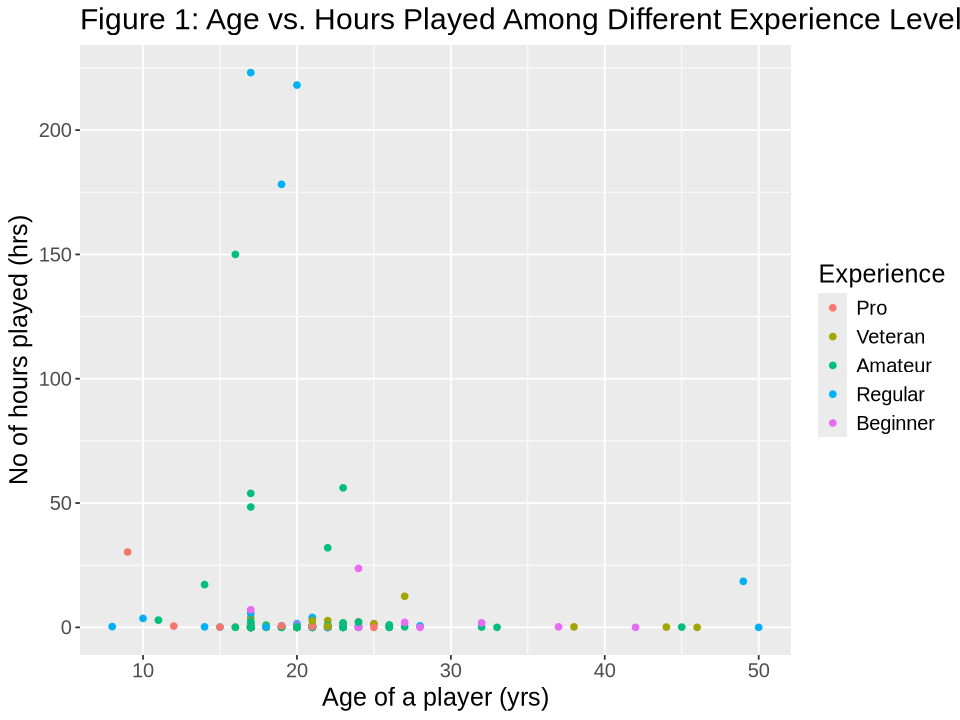

In [25]:
# Create a scatter plot to see if there is correlation between the three variables in general

options(repr.plot.width = 8, repr.plot.height = 6)

figure_1 <- clean_player_data |>
        ggplot(aes(x = Age , y = played_hours, color = experience)) + 
        geom_point() +
        xlab("Age of a player (yrs)")+
        ylab("No of hours played (hrs)")+
        labs(colour = "Experience" )+
        ggtitle("Figure 1: Age vs. Hours Played Among Different Experience Levels") +
        theme(text = element_text(size=15))
figure_1

### Explanation for Figure 1

Figure 1 displays a scatter plot of two predictor variables — players' age and their played hours — with points colored by experience level, which is the response variable.

From this plot, we don’t observe any clear correlation between the predictors and experience level.

In [26]:
# Group the players by experience level, 
# find the average played hours and average age among players in each experience level.

mean_data_experience <- clean_player_data |>
                        group_by(experience) |>
                        summarize(mean_played_hours = mean(played_hours, na.rm = TRUE),
                                           mean_age = mean(Age, na.rm = TRUE))
mean_data_experience

experience,mean_played_hours,mean_age
<fct>,<dbl>,<dbl>
Pro,2.7846154,16.92308
Veteran,0.6479167,20.95833
Amateur,6.0174603,20.25397
Regular,18.7257143,20.60000
Beginner,1.2485714,21.65714


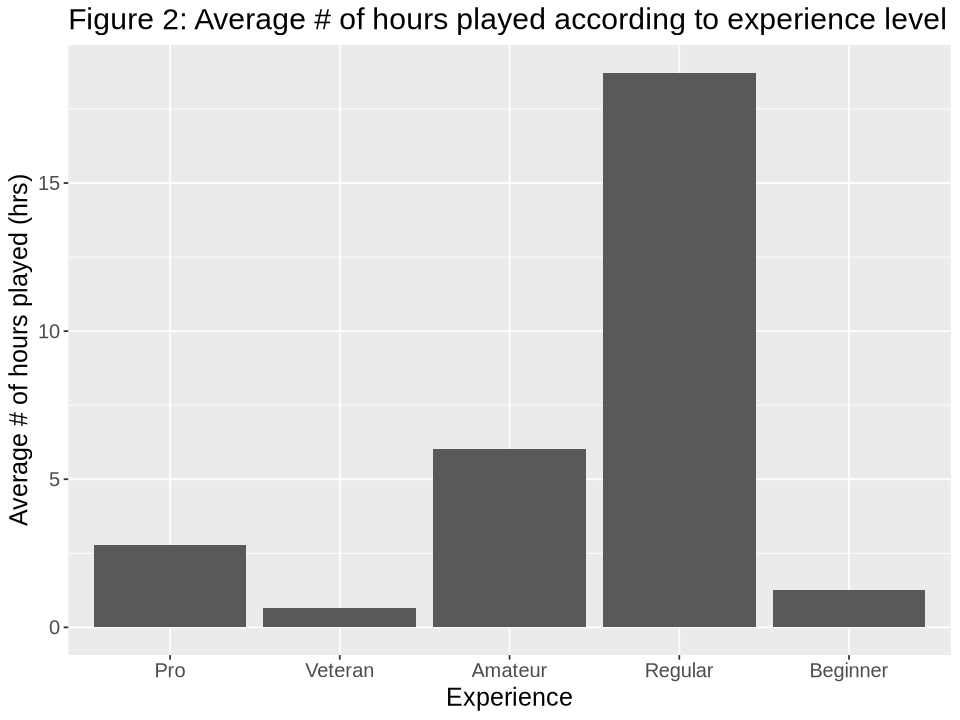

In [27]:
# Create a bar plot comparing the average playing hours (our first predictor variable) 
# among players in each experience level.

figure_2 <- mean_data_experience |>
        ggplot(aes(x = experience , y = mean_played_hours)) + 
        geom_bar(stat = "identity") +
        xlab("Experience")+
        ylab("Average # of hours played (hrs)")+
        ggtitle("Figure 2: Average # of hours played according to experience level") +
        theme(text = element_text(size = 15))
figure_2

### Explanation for Figure 2

In Figure 2, we grouped players by experience level and calculated the average played hours (our first predictor variable) for each group, then visualized the results.

The mean played hours vary noticeably across the experience levels, ranked from highest to lowest as: Regular, Amateur, Pro, Beginner, and Veteran. However, no clear or consistent pattern emerges from this ranking.

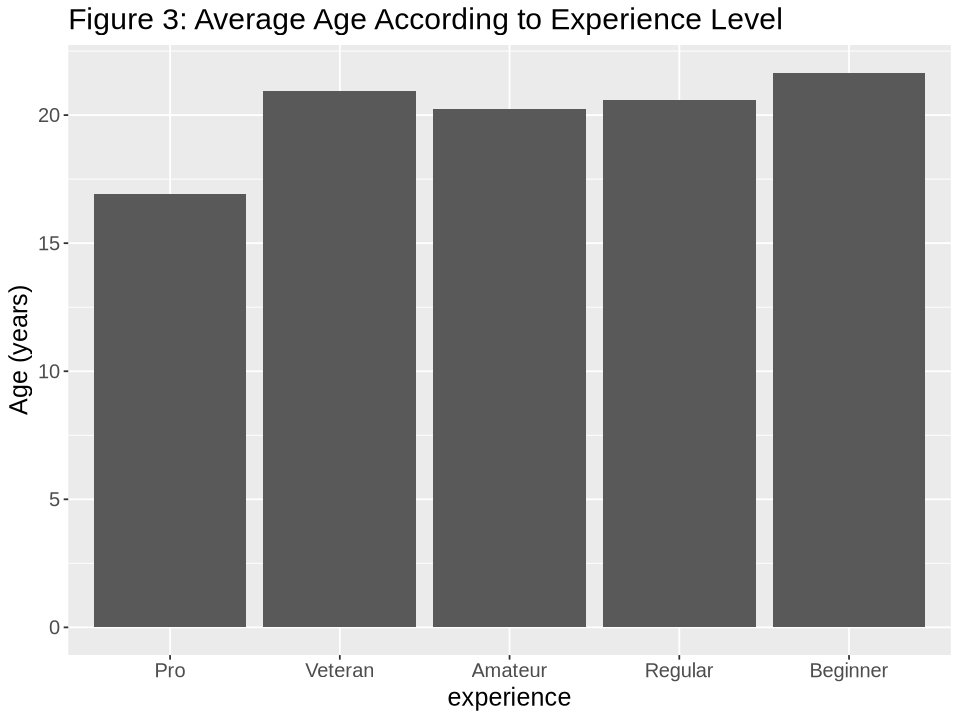

In [30]:
# Create a bar plot comparing the average age (our second predictor variable) 
# among players in each experience level.

figure_3 <- mean_data_experience |>
        ggplot(aes(x = experience , y = mean_age)) + 
        geom_bar(stat = "identity") +
        xlab("experience") +
        ylab("Age (years)") +
        ggtitle("Figure 3: Average Age According to Experience Level") +
        theme(text = element_text(size = 15))
figure_3

### Explanation for Figure 3

In Figure 3, we grouped players by experience level and calculated the average played hours (our second predictor variable) for each group, then visualized the results.

The mean played hours vary slightly across the experience levels, ranked from highest to lowest as: Beginner, Veteran, Regular, Amateur, and Pro. However, no clear or consistent pattern emerges from this ranking.

## Choosing the Most Accurate K-value for KNN Classification

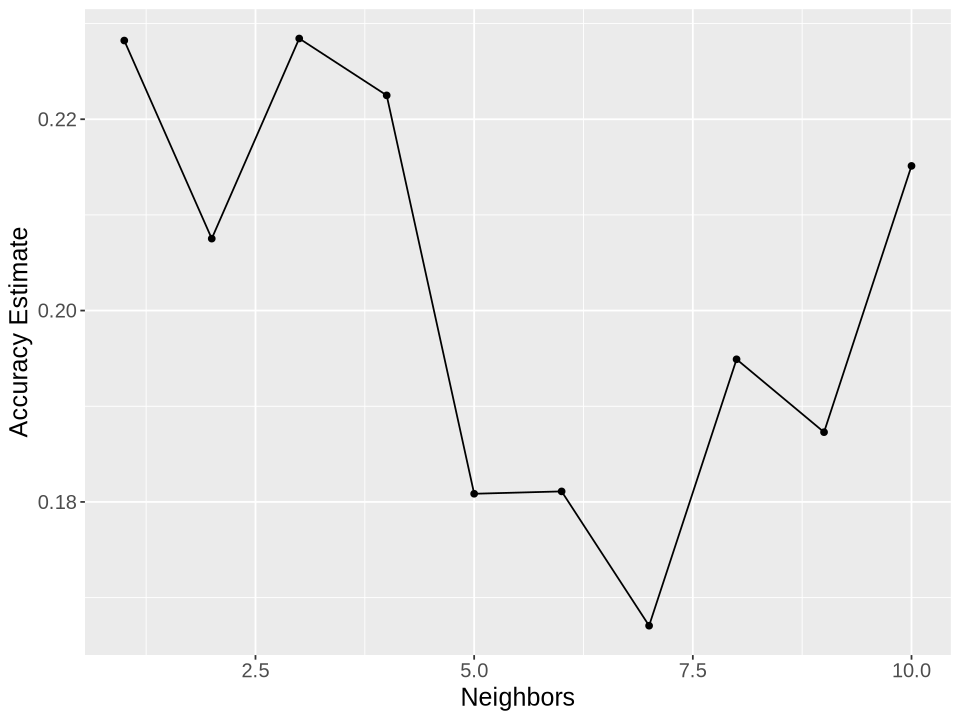

In [32]:
# Set the seed
set.seed(1234)

# Split the data into training set and testing set
player_split <- initial_split(clean_player_data, prop = 0.75, strata = experience)
player_train <- training(player_split)
player_test <- testing(player_split)

# Cross 5-fold cross-validation
player_vfold <- vfold_cv(player_train, v = 5, strata = experience)

# Set model
knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
    set_engine("kknn") |>
    set_mode("classification")

# Set recipe
knn_recipe <- recipe(experience ~ Age + played_hours, data = player_train) |>
    step_scale(all_predictors()) |>
    step_center(all_predictors())

# Fit the model and evaluating its performance for each neighbor from 1 to 10
knn_result <- workflow() |>
    add_recipe(knn_recipe) |>
    add_model(knn_spec) |>
    tune_grid(resamples = player_vfold, grid = tibble(neighbors = c(1,2,3,4,5,6,7,8,9,10))) |>
    collect_metrics() 

# Create lineplot to see where the accuracy is at the highest
accuracies <- knn_result |>
    filter(.metric == 'accuracy')

cross_val_plot <- ggplot(accuracies, aes(x = neighbors, y = mean)) +
                  geom_point() +
                  geom_line() +
                  labs(x = 'Neighbors', y = 'Accuracy Estimate') +
                  theme(text = element_text(size = 15))
cross_val_plot              

### The most accurate k-value is 3. 

We begin by setting a random seed with set.seed(1234) to ensure reproducibility. The dataset is then split into training (75%) and testing (25%) sets using initial_split(), with stratification by the experience variable to preserve the same class distribution across both sets.

To identify the optimal number of neighbors (k) for the KNN model, we perform 5-fold cross-validation on the training data, again stratifying by experience. This is done using the vfold_cv() function, which creates five distinct training-validation splits for model tuning.

Next, we build a preprocessing recipe using recipe(), where the predictors (Age and played_hours) are centered and scaled, and experience is set as the outcome variable. This recipe is combined with the KNN model into a workflow.

Using tune_grid(), the workflow is trained across a range of k-values, fitting the model and evaluating its performance for each one.

Finally, a plot is created to visualize how accuracy changes across different k-values. The k-value with the highest accuracy estimate is selected for the final evaluation on the test set.


## Knn-Classification

In [34]:
# Use the model with the best k on the test set

player_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 3) |>
       set_engine("kknn") |>
       set_mode("classification")

player_fit <- workflow() |>
             add_recipe(knn_recipe) |>
             add_model(player_spec) |>
             fit(data = player_train)
player_fit

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

• step_scale()
• step_center()

── Model ───────────────────────────────────────────────────────────────────────

Call:
kknn::train.kknn(formula = ..y ~ ., data = data, ks = min_rows(3,     data, 5), kernel = ~"rectangular")

Type of response variable: nominal
Minimal misclassification: 0.6875
Best kernel: rectangular
Best k: 3

## Evaluating the Accuracy

In [36]:
# Use the model to make predictions
player_prediction <- predict(player_fit, player_test) |>
    bind_cols (player_test)  
player_prediction

# Compute the accuracy
accuracy <- player_prediction |>
    metrics(truth = experience, estimate = .pred_class) |>
    filter(.metric == "accuracy")
accuracy

.pred_class,experience,subscribe,hashedEmail,played_hours,name,gender,Age
<fct>,<fct>,<lgl>,<chr>,<dbl>,<chr>,<fct>,<dbl>
Amateur,Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Veteran,Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,Pro,TRUE,4caa42e1b20511552434978171dcf7283fb6eb857eb871327e39bfc328002309,0.0,Daniela,Male,17
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
Amateur,Amateur,TRUE,e3f0ad9aadd27f3d1d9197e58546d045018daa767675033d9af9a2b74e763739,0.0,Jasper,Male,17
Amateur,Amateur,TRUE,b6e9e593b9ec51c5e335457341c324c34a2239531e1890b93ca52ac1dc76b08f,0.0,Bailey,Female,17
Pro,Amateur,FALSE,f19e136ddde68f365afc860c725ccff54307dedd13968e896a9f890c40aea436,2.3,Harlow,Male,17


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,multiclass,0.3


### Explanation of the Result Above

We define the final k-nearest neighbors (KNN) model by setting neighbors = 3, based on the tuning results. This model is combined with the previously created recipe in a workflow.

Using fit(), we train the finalized workflow on the training dataset. The trained model confirms it uses a rectangular kernel with k = 3.

We then generate predictions on the testing data using predict(), and combine these predictions with the actual test set using bind_cols() to enable comparison. The model’s accuracy is calculated by comparing the predicted experience levels (.pred_class) to the actual values.

The final test accuracy is 0.3, meaning the model correctly predicted the experience level for only 30% of the cases.

## Confusion Matrix

In [38]:
# Create a confusion matrix

player_test_predictions <-  player_prediction |>
    conf_mat(truth = experience, estimate = .pred_class)
player_test_predictions

          Truth
Prediction Pro Veteran Amateur Regular Beginner
  Pro        0       0       1       0        3
  Veteran    0       1       2       2        1
  Amateur    2       8      12       6        4
  Regular    0       1       0       1        1
  Beginner   0       3       1       0        1

## Figure 4 - Visualzation for Predicted vs Actual Observations for Each Experience Level

In [40]:
# Create a new column that combines the two cols: .pred_class and experience
# This new column shows whether the prediction is the same as the actual observation (true or false)
player_prediction_2 <- player_prediction|>
mutate(matches = .pred_class == experience)
player_prediction_2

.pred_class,experience,subscribe,hashedEmail,played_hours,name,gender,Age,matches
<fct>,<fct>,<lgl>,<chr>,<dbl>,<chr>,<fct>,<dbl>,<lgl>
Amateur,Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21,TRUE
Veteran,Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21,FALSE
Amateur,Pro,TRUE,4caa42e1b20511552434978171dcf7283fb6eb857eb871327e39bfc328002309,0.0,Daniela,Male,17,FALSE
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
Amateur,Amateur,TRUE,e3f0ad9aadd27f3d1d9197e58546d045018daa767675033d9af9a2b74e763739,0.0,Jasper,Male,17,TRUE
Amateur,Amateur,TRUE,b6e9e593b9ec51c5e335457341c324c34a2239531e1890b93ca52ac1dc76b08f,0.0,Bailey,Female,17,TRUE
Pro,Amateur,FALSE,f19e136ddde68f365afc860c725ccff54307dedd13968e896a9f890c40aea436,2.3,Harlow,Male,17,FALSE


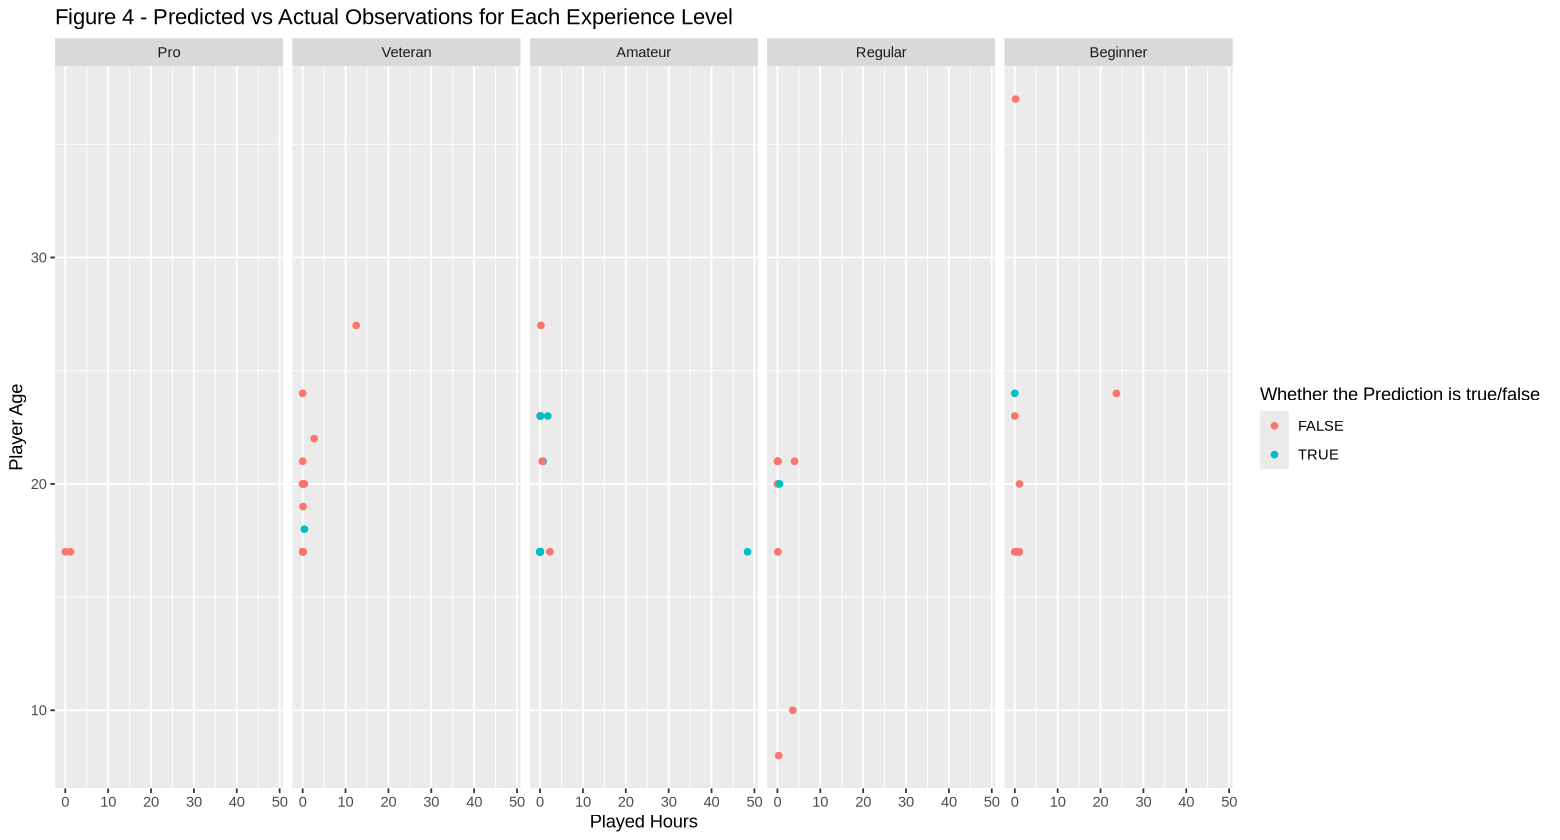

In [41]:
options(repr.plot.width = 13, repr.plot.height = 7)

figure_4 <- ggplot(player_prediction_2, aes(x = played_hours, y = Age)) +
     geom_point(aes(color = matches)) +
     labs(color="Whether the Prediction is true/false") +
     xlab("Played Hours") +
     ylab("Player Age") +
     ggtitle("Figure 4 - Predicted vs Actual Observations for Each Experience Level") +
     facet_grid(cols = vars(experience))
figure_4

### Explanation for Figure 4

In Figure 4, it is evident that most predictions results are inaccurate. The red dots in this plot represent the players in such age and played hours are getting their experience level predicted wrong. The blue dots represent the players in such age and played hours are getting their experience level predicted correctly. The wrong predictions results are significantly more than the the correct results, showing the lack of correlation between age, played hours and experience.

## Calculation for Accuracy, Precision, and Recall (for each class)

#### 1. Accuracy Calculation:
   
Accuracy = Total Correct Predictions / Total Predictions

         = (0 + 1 + 12 + 1 + 1) / 50
         
         = 15 / 50
         
         = 30%

#### 2. Precision Calculation:

Precision = Correct Positive Predictions / Total Number of Positive Predictions.

Pro Class Precision      =  0 / (0 + 0 + 2 + 0 + 0)  =   0/2 =  0.00%

Veteran Class Precision  =  1 / (0 + 1 + 8 + 1 +3 )  =  1/13 =  7.69%

Amateur Class Precision  = 12 / (1 + 2 + 12 + 0 + 1) = 12/16 = 75.00%

Regular Class Precision  =  1 / (0 + 2 + 6 + 1 + 0)  =   1/9 = 11.11%

Beginner Class Prevision =  1 / (3 + 1 + 4 + 1 + 1)  =  1/10 = 10.00%

##### Average Precision = 1/5 * (0% + 7.69% + 75% + 11.11% + 10%) = 20.76%

#### 3. Recall Calculation

Recall = Correct Positive Predictions / total Positive Observations.

Pro Class Recall      =  0 / (0 + 0 + 1 + 0 + 3)  =   0/4 =  0.00%

Veteran Class Recall  =  1 / (0 + 1 + 2 + 2 + 1)  =   1/6 = 16.67%

Amateur Class Recall  = 12 / (2 + 8 + 12 + 6 + 4) = 12/16 = 37.50%

Regular Class Recall  =  1 / (0 + 1 + 0 + 1 + 1)  =   1/3 = 33.33%

Beginner Class Recall =  1 / (0 + 3 + 1 + 0 + 1)  =   1/5 = 20.00%

##### Average Recall = 1/5 * (0% + 16.67% + 37.50% + 33.33% + 20.00%) = 21.5%

## Discussion

From the Knn specification, The most suitable k value we got was 3. However by filtering the prediction according to accuracy, the accuracy estimate we got was 0.3 which is very low. There is a 68.8% chance of missclassification so we conclude that the age and played hours cannot be used to predict a persons experience level.

This was not what we expected to find since we were expecting the model to be able to predict the experience level of a player when their age and player hours was given.

Impact this finding can have:
Since the model has a high chance of predicting an inacurate result, this model could lead to false information about the data. 

this could lead to more questions such as :
will the model give a more accurate estimate for the player experience if we used all the variables to predict their experience instead of just 2. 
Will a different model give a better prediction of experience level for the same 2 variables.
Would we getter better prediction if the dataset was larger than 196 observations?